### Dimensionality Reduction


https://www.mathsisfun.com/algebra/eigenvalue.html

**Feature extraction**

* **PCA** – Unsupervised 
* **LDA** – Supervised

**PCA (Principal Component Analysis)** tries to find the directions (or columns) of the maximum variance in the dataset. 

* In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. 

* The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features.

* Fewer input variables can result in a simpler predictive model that may have better performance when making predictions on new data

* Projection methods like PCA and LDA seek to reduce the number of dimensions in the feature space whilst also preserving the most important structure or relationships between the variables observed in the data.

* The resulting dataset, the projection, can then be used as input to train a machine learning model.

* In essence, the original features no longer exist and new features are constructed from the available data that are not directly comparable to the original data, e.g. don’t have column names.

* Any new data that is fed to the model in the future when making predictions, such as test dataset and new datasets, must also be projected using the same technique.

**PCA for dimensionality reduction**

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


* **Standardization**: StandardScaler standardizes features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
z = (x - u) / s
* However, the outliers have an influence when computing the empirical mean and standard deviation

* **Normalization** : MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. 
A value is normalized as follows:

y = (x – min) / (max – min)

* The evaluaion metrics should decide your approach


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
# MinMaxScaler can also be tried
print(x[0])
#x = StandardScaler().fit_transform(x)
x = MinMaxScaler().fit_transform(x)
print(x[0])

[5.1 3.5 1.4 0.2]
[0.22222222 0.625      0.06779661 0.04166667]


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df.target],axis=1)
print(finalDf.tail())

     principal component 1  principal component 2          target
145               0.551755               0.058990  Iris-virginica
146               0.406278              -0.172227  Iris-virginica
147               0.447293               0.036996  Iris-virginica
148               0.489218               0.149121  Iris-virginica
149               0.312079              -0.031151  Iris-virginica


array([0.84141901, 0.11732474])

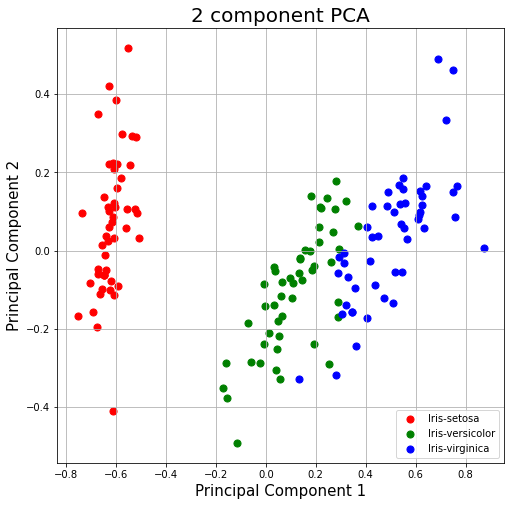

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#By using the attribute explained_variance_ratio_, you can see that the first principal component 
#contains 72.77% of the variance and the second principal component contains 23.03% of the variance. 
#Together, the two components contain 95.80% of the information.

pca.explained_variance_ratio_

**LDA for dimensonality reduction**

* Unlike PCA, **LDA (Linear discriminant analysis )** tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. 

* LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. 

* The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

* In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.



In [16]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

newDf = pd.DataFrame(data = X_lda
             , columns = ['Linear discriminant 1', 'Linear discriminant 2'])
finalDf = pd.concat([newDf, dataset.Class],axis=1)
print(finalDf.head())

   Linear discriminant 1  Linear discriminant 2        Class
0               8.084953               0.328454  Iris-setosa
1               7.147163              -0.755473  Iris-setosa
2               7.511378              -0.238078  Iris-setosa
3               6.837676              -0.642885  Iris-setosa
4               8.157814               0.540639  Iris-setosa


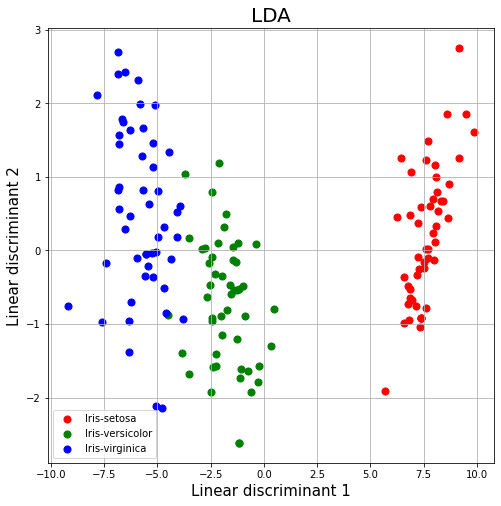

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Linear discriminant 1', fontsize = 15)
ax.set_ylabel('Linear discriminant 2', fontsize = 15)
ax.set_title('LDA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    #print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'Linear discriminant 1']
               , finalDf.loc[indicesToKeep, 'Linear discriminant 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
